In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
# the above line makes sure the show the graphs in the notebook

In [3]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

In [4]:
df = pd.read_csv('homework.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [7]:
print(df.isnull().sum())
df.dtypes

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [9]:
df['annual_income'] = df['annual_income'].fillna(0.0)
df[['lead_source', 'industry', 'employment_status', 'location']] = df[['lead_source', 'industry', 'employment_status', 'location']].fillna('NA')

df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

#### Q1

In [ ]:
# df['industry'].value_counts(ascending=False)
df.industry.mode()

0    retail
Name: industry, dtype: object

In [29]:
round(df.corr(numeric_only=True),3)

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000,0.010,-0.024,-0.005,0.436
annual_income,0.010,1.000,0.027,0.016,0.053
interaction_count,-0.024,0.027,1.000,0.010,0.375
lead_score,-0.005,0.016,0.010,1.000,0.194
converted,0.436,0.053,0.375,0.194,1.000


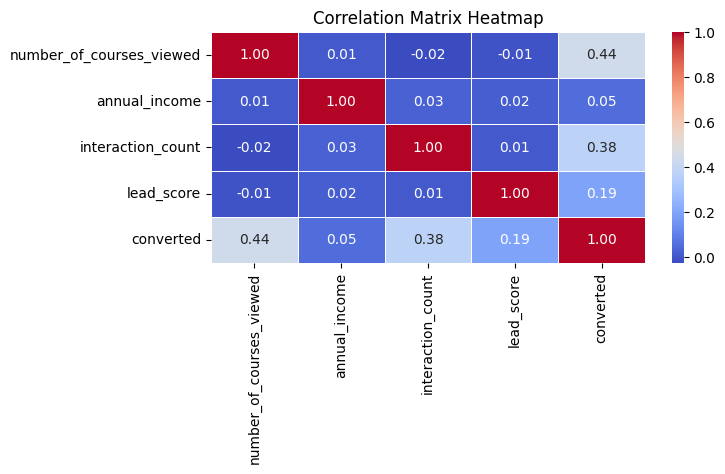

In [30]:
plt.figure(figsize=(7, 3))  # size of the plot
sns.heatmap(round(df.corr(numeric_only=True),3), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [31]:
from sklearn.model_selection import train_test_split

In [33]:
df_full_train, df_test = train_test_split(df, test_size=0.2 ,random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25 ,random_state=42)

len(df_train), len(df_val), len(df_test), len(df_full_train)

(876, 293, 293, 1169)

In [34]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [35]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [36]:
from sklearn.metrics import mutual_info_score

In [42]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']

for c in categorical:
    print(c)
    print(round(mutual_info_score(df_full_train.converted, df_full_train[c]),2))
    print()

lead_source
0.03

industry
0.01

employment_status
0.01

location
0.0



#### Q4

In [43]:
from sklearn.feature_extraction import DictVectorizer

In [44]:
dv = DictVectorizer(sparse= False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [45]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [58]:
y_pred = model.predict_proba(X_val)[:,1]


In [59]:
(y_pred > 0.5)

array([ True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,

In [63]:
converted_desicion = (y_pred > 0.5)
q4_model_acc = (y_val == converted_desicion).mean()
q4_model_acc

np.float64(0.6996587030716723)

#### Q5

In [61]:
def calculate_accuracy(y_pred, y_val):
    converted_desicion = (y_pred > 0.5)
    return (y_val == converted_desicion).mean()

In [66]:
skip_cols = ['industry', 'employment_status', 'lead_score']

for c in skip_cols:
    small_train = df_train.drop(c,axis=1)
    small_train_dict = small_train.to_dict(orient='records')
    X_small_train = dv.fit_transform(small_train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

    model.fit(X_small_train, y_train)

    small_val = df_val.drop(c,axis=1)
    small_val_dict = small_val.to_dict(orient='records')
    X_small_val = dv.transform(small_val_dict)
    y_pred = model.predict_proba(X_small_val)[:,1]

    res = calculate_accuracy(y_pred, y_val)

    print(f'for {c} we have accuracy of {res} and difference of {q4_model_acc - res}')

for industry we have accuracy of 0.6996587030716723 and difference of 0.0
for employment_status we have accuracy of 0.6962457337883959 and difference of 0.0034129692832763903
for lead_score we have accuracy of 0.7064846416382252 and difference of -0.0068259385665528916


#### Q6

In [70]:
C = [0.01, 0.1, 1, 10, 100,100000]

for c in C:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:,1]

    res = calculate_accuracy(y_pred, y_val)

    print(f'For C={c} we have accuracy of {res}')

For C=0.01 we have accuracy of 0.6996587030716723
For C=0.1 we have accuracy of 0.6996587030716723
For C=1 we have accuracy of 0.6996587030716723
For C=10 we have accuracy of 0.6996587030716723
For C=100 we have accuracy of 0.6996587030716723
For C=100000 we have accuracy of 0.6996587030716723
